In [6]:
# Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import warnings
warnings.filterwarnings("ignore")
import os

# Get the current working directory
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
# Functions for data analysis

def parse_coordinates(input_string):
    # Extract numerical values using regular expression
    matches = re.findall(r'[-+]?\d*\.\d+|\d+', input_string)

    # Convert the extracted values to float and then to a NumPy array
    result_array = np.array([float(match) for match in matches])

    return result_array

def reproduce_dataset(original_dataframe):
    reproduced_dataset = []

    for _, row in original_dataframe.iterrows():
        entry, count = row['Type'], row['Counts']
        reproduced_dataset.extend([entry] * count)

    return pd.DataFrame({'Type': reproduced_dataset})

def count_substring_occurrences(array, substring):
    total_count = 0
    for string in array:
        total_count += string.count(substring)
    return total_count

In [7]:
data=pd.read_csv('Data/100KGP/MSS_WGD.csv')
data
data['Regions']=data['Regions'].apply(parse_variable_coordinates)
ms=[]
for d in data['Regions']:
    ms.append(len(d))
data['#muts']=ms
data['Copy_number']=data['Copy_number_1'].apply(parse_coordinates)


In [8]:
copyloss=0
for i in np.arange(len(data)):
    if data['#muts'][i]>1:
        if data['WGD'][i]==True:
            if len(data['Copy_number'][i])>0:
                if data['Copy_number'][i][1]==0:
                    if data['Copy_number'][i][0]==1:
    
                      copyloss+=data['Counts'][i]


13 21 5
13 5 21 564
44


0.0713128038897893

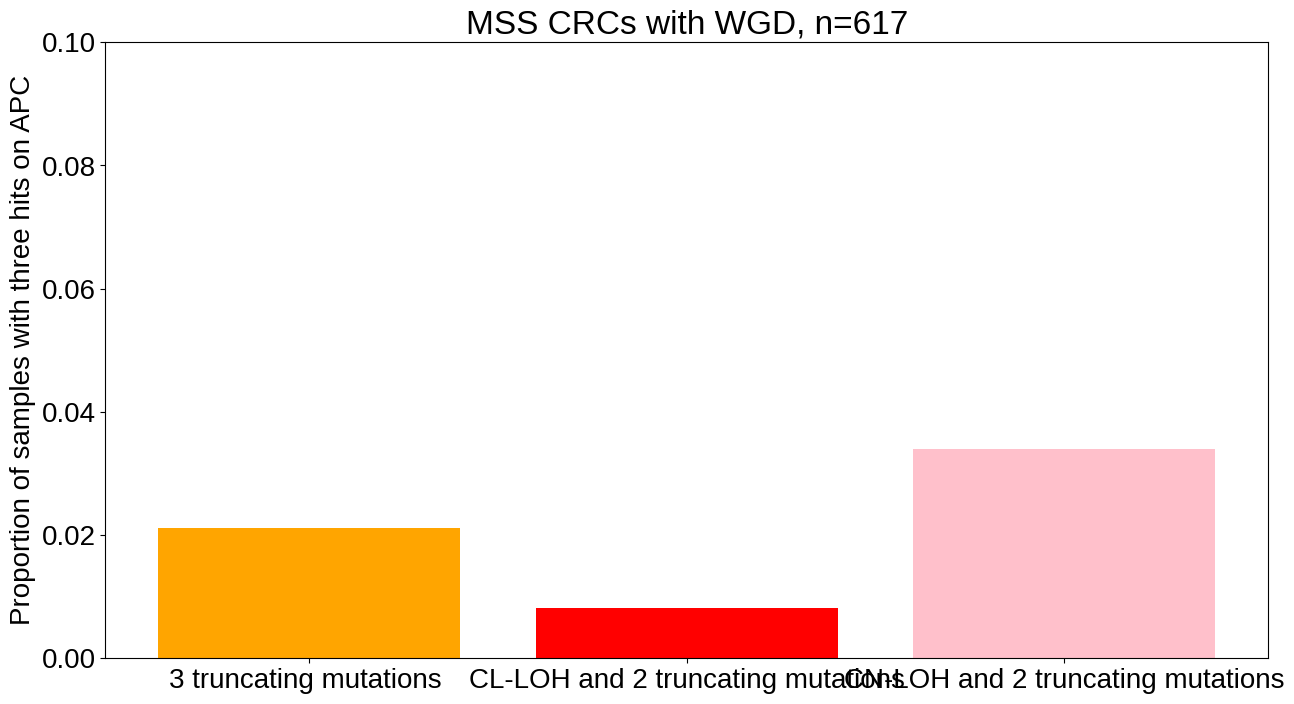

In [9]:
now=data[data['WGD']==True].reset_index(drop=True)
three=0
cnloh=0
deloh=0
for d in np.arange(len(now)):
    if len(now['Copy_number'][d]>0):
        if now['Copy_number'][d][1]>0:
            if now['#muts'][d]>2:
                three+=now['Counts'][d]
        elif now['Copy_number'][d][0]>1:
            if now['#muts'][d]>1:
                cnloh+=now['Counts'][d]
        elif now['Copy_number'][d][0]==1:
            if now['#muts'][d]>1:
                deloh+=now['Counts'][d]
                

plt.figure(figsize=(15,8))

print(three,cnloh,deloh)
plt.rcParams.update({'font.size': 20})
plt.rcParams['font.family'] = 'Liberation Sans'
plt.ylim([0,0.1])
print(three,deloh,cnloh,      sum(now['Counts']))
plt.bar(['3 truncating mutations ','CL-LOH and 2 truncating mutations','CN-LOH and 2 truncating mutations'],np.asarray([three,deloh,cnloh])/617, color=['orange','red','pink'])
plt.title('MSS CRCs with WGD, n=617')
plt.ylabel('Proportion of samples with three hits on APC')
print(16+22+6)
plt.savefig('Results/nwgd.svg',dpi=300)
44/617

13 16 5 564
13 16 5 564
34


0.06028368794326241

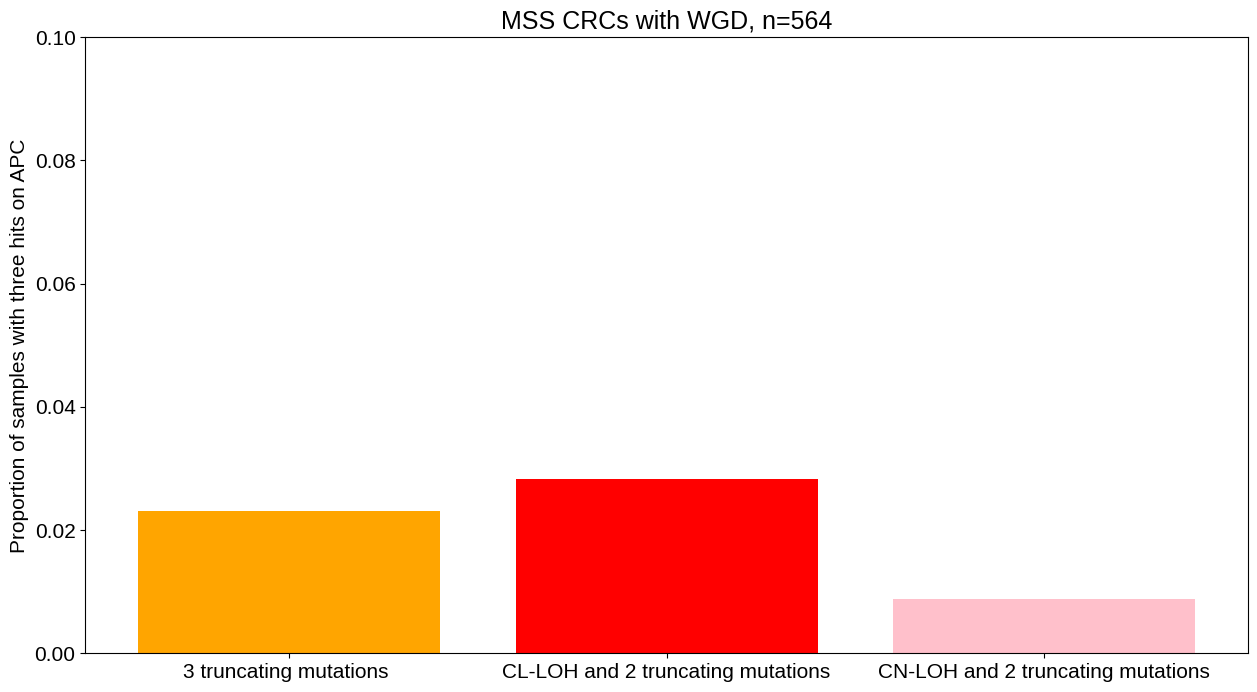

In [10]:
now=data[data['WGD']==True].reset_index(drop=True)
three=0
cnloh=0
deloh=0
for d in np.arange(len(now)):
    if len(now['Copy_number'][d]>0):
        if now['Copy_number'][d][1]>0:
            if now['#muts'][d]>2:
                three+=now['Counts'][d]
        elif now['Copy_number'][d][0]>2:
            if now['#muts'][d]>1:
                cnloh+=now['Counts'][d]
        elif now['Copy_number'][d][0]>1:
            if now['#muts'][d]>1:
                deloh+=now['Counts'][d]
                
print(three,deloh,cnloh,      sum(now['Counts']))


plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'Liberation Sans'
plt.ylim([0,0.1])

print(three,deloh,cnloh,      sum(now['Counts']))
plt.bar(['3 truncating mutations ','CL-LOH and 2 truncating mutations','CN-LOH and 2 truncating mutations'],np.asarray([three,deloh,cnloh])/564, color=['orange','red','pink'])
plt.title('MSS CRCs with WGD, n=564')
plt.ylabel('Proportion of samples with three hits on APC')
print(13+16+5)
plt.savefig('Results/wgd.svg',dpi=300)
34/564

In [11]:
import numpy as np
import scipy.stats as stats

# Sample data (frequencies of a value and sample sizes)
frequency1 = 44  # Frequency of the value in population 1
frequency2 = 34  # Frequency of the value in population 2
n1 = 617        # Sample size of population 1
n2 = 564        # Sample size of population 2

# Create the contingency table
observed = np.array([[frequency1, n1 - frequency1], [frequency2, n2 - frequency2]])

# Perform chi-squared test for independence
chi2_statistic, p_value, dof, expected = stats.chi2_contingency(observed)

# Significance level
alpha = 0.01

# Check if p-value is less than significance level
if p_value / 2 < alpha:
    print("Reject null hypothesis. There is a significant difference, and frequency is smaller in population 1 than in population 2.")
else:
    print("Fail to reject null hypothesis. There is no significant difference, or the frequency is not smaller in population 1 than in population 2.")


Fail to reject null hypothesis. There is no significant difference, or the frequency is not smaller in population 1 than in population 2.
